### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

## Load data from final csv

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'LoanAmountLog', 'IncomeLog'],
      dtype='object')

In [4]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [5]:
X = pd.get_dummies(X)

In [6]:
X.shape, y.shape

((564, 16), (564,))

## Logistic Regression

In [7]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Split data into train and test data 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
# logistic regression   
model = LogisticRegression(random_state=1, max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=1)

In [10]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8248337028824834

In [11]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.7787610619469026


In [12]:
model.intercept_, model.coef_

(array([-0.23299448]),
 array([[ 9.60178001e-02, -1.29121842e-03,  3.54536578e+00,
         -1.21697411e-01, -8.59638909e-02, -2.17515101e-01,
          2.85766256e-02, -2.77420752e-01,  8.84822763e-02,
          5.08936597e-02, -2.39832135e-01, -1.57378875e-01,
         -3.15596006e-02, -3.24725581e-01,  3.66294441e-01,
         -2.30507335e-01]]))

In [13]:
y_pred_prob = model.predict_proba(X_test)

### Display confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13, 22],
       [ 3, 75]], dtype=int64)

In [15]:
tn = cm[0,0]
tp = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [16]:
print('Accuracy :', (tn + tp) / (tp + tn + fp + fn))

Accuracy : 0.7787610619469026


In [17]:
print('Sensitivity', tp / (tp + fn))

Sensitivity 0.9615384615384616


In [18]:
print("Positive Precision :", tp / (tp + fn))

Positive Precision : 0.9615384615384616


In [19]:
print('Specificity', tn / (tn + fp))

Specificity 0.37142857142857144


In [20]:
print("Negative Precision :", tn / (tn + fn))

Negative Precision : 0.8125


### Display classification report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.37      0.51        35
           1       0.77      0.96      0.86        78

    accuracy                           0.78       113
   macro avg       0.79      0.67      0.68       113
weighted avg       0.79      0.78      0.75       113



In [22]:
y_pred_prob[:5]

array([[0.26867291, 0.73132709],
       [0.11869394, 0.88130606],
       [0.13848761, 0.86151239],
       [0.13292543, 0.86707457],
       [0.24292957, 0.75707043]])

In [23]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

### Prevision Recall Curve

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.decision_function(X_test))

In [26]:
pos = np.argmin(np.abs(thresholds))

precisions[pos], recalls[pos], thresholds[pos]

(0.7731958762886598, 0.9615384615384616, 0.4200349252977187)

In [27]:
y_pred_prob[:5]

array([[0.26867291, 0.73132709],
       [0.11869394, 0.88130606],
       [0.13848761, 0.86151239],
       [0.13292543, 0.86707457],
       [0.24292957, 0.75707043]])

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

In [29]:
fscore = 2 * ((precisions * recalls) / (precisions + recalls))

<ipython-input-29-3e3915af32c6>:1: RuntimeWarning: invalid value encountered in true_divide
  fscore = 2 * ((precisions * recalls) / (precisions + recalls))


In [30]:
fscore[np.isnan(fscore) == False]

array([0.84324324, 0.83695652, 0.84153005, 0.84615385, 0.83977901,
       0.84444444, 0.84916201, 0.85393258, 0.84745763, 0.85227273,
       0.85714286, 0.85057471, 0.85549133, 0.84883721, 0.85380117,
       0.85882353, 0.85207101, 0.8452381 , 0.8502994 , 0.84337349,
       0.83636364, 0.82926829, 0.83435583, 0.82716049, 0.83229814,
       0.825     , 0.81761006, 0.82278481, 0.82802548, 0.83333333,
       0.82580645, 0.81818182, 0.81045752, 0.80263158, 0.80794702,
       0.81333333, 0.81879195, 0.82432432, 0.82993197, 0.82191781,
       0.8137931 , 0.80555556, 0.7972028 , 0.8028169 , 0.79432624,
       0.78571429, 0.79136691, 0.7826087 , 0.77372263, 0.76470588,
       0.75555556, 0.74626866, 0.7518797 , 0.74242424, 0.73282443,
       0.72307692, 0.71317829, 0.703125  , 0.69291339, 0.68253968,
       0.672     , 0.66129032, 0.6504065 , 0.6557377 , 0.6446281 ,
       0.63333333, 0.62184874, 0.61016949, 0.5982906 , 0.5862069 ,
       0.57391304, 0.56140351, 0.56637168, 0.55357143, 0.54054

In [31]:
ix = np.argmax(fscore[np.isnan(fscore) == False])
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.662726, F-Score=0.859


In [32]:
r_pos = np.argmax(recalls[:-1])
p_pos = np.argmax(precisions[:-1])
print(r_pos, p_pos, recalls[r_pos], precisions[p_pos], thresholds[r_pos], thresholds[p_pos])

0 85 1.0 0.9545454545454546 0.11319926733662117 0.8355860141044639


In [33]:
(precisions[:10], recalls[:10], thresholds[:10])

(array([0.72897196, 0.72641509, 0.73333333, 0.74038462, 0.73786408,
        0.74509804, 0.75247525, 0.76      , 0.75757576, 0.76530612]),
 array([1.        , 0.98717949, 0.98717949, 0.98717949, 0.97435897,
        0.97435897, 0.97435897, 0.97435897, 0.96153846, 0.96153846]),
 array([0.11319927, 0.11825568, 0.11937571, 0.11949387, 0.12858657,
        0.12965331, 0.13201288, 0.13613317, 0.1603059 , 0.17732071]))

Text(0, 0.5, 'Recall')

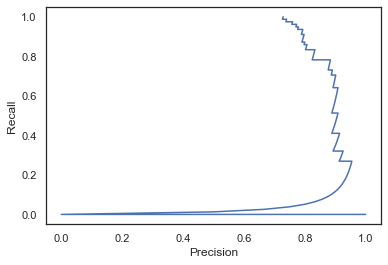

In [34]:
plt.plot(precisions,recalls,label="Precision vs. Recall")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [35]:
y_pred_prob_rate =  model.predict_proba(X_test) >= .40
print(classification_report(y_test,y_pred_prob_rate[:,1]))

              precision    recall  f1-score   support

           0       0.81      0.37      0.51        35
           1       0.77      0.96      0.86        78

    accuracy                           0.78       113
   macro avg       0.79      0.67      0.68       113
weighted avg       0.79      0.78      0.75       113



In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
fpr, tpr , thresholds = roc_curve(y_test,y_pred)

In [38]:
fpr,tpr,thresholds

(array([0.        , 0.62857143, 1.        ]),
 array([0.        , 0.96153846, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0, 0.5, 'TPR')

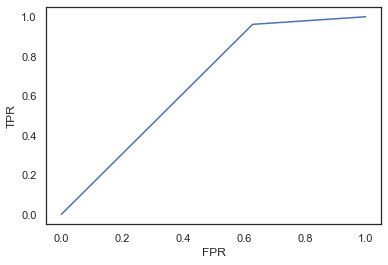

In [39]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [40]:
auc(fpr,tpr)

0.6664835164835166

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6664835164835166